### 6. GBDT Model Training and Test

In [1]:
# import libraries used

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder, LabelEncoder

import swifter
import gc

In [2]:
# Load processed dataset.

data = pd.read_pickle('v30_data_embed.pkl')

In [3]:
# train, validation, test data set parameter setting.

test_date_block = 34
val_date_block = test_date_block - 1
train_date_block = val_date_block - 1

In [4]:
# load missing 
#df_missing = pd.read_csv("missing_replace.csv", sep=',')

In [5]:
#for index, row in df_missing.iterrows():
#    data.loc[data.item_id == row.item_id, 'item_id'] = row.rep_id

In [6]:
#data

#### 6.1 On Sale Model Training

#### 6.1.1 All Samples Model

In [7]:
on_sale_data = data.copy()

In [8]:
drop_list_on_sale = [
    'days',
    'shop_city',
    'avg_date_city_item_cnt_lag_1',
    'avg_date_city_item_cnt_lag_2',
    'avg_date_city_item_cnt_lag_3',
    'shop_item_on_market',
    #'shop_item_no_sale',
    #'avg_date_item_price_cnt_lag_1',
    'avg_date_item_price_cnt_lag_2',
    'avg_date_item_price_cnt_lag_3',
    #'avg_date_shop_item_price_cnt_lag_1',
    'avg_date_shop_item_price_cnt_lag_2',
    'avg_date_shop_item_price_cnt_lag_3',
    'avg_date_cat_price_cnt_lag_1',
    'avg_date_cat_price_cnt_lag_2',
    'avg_date_cat_price_cnt_lag_3',
    'avg_date_shop_cat_price_cnt_lag_1',
    'avg_date_shop_cat_price_cnt_lag_2',
    'avg_date_shop_cat_price_cnt_lag_3',
    'date_item_price_lag_2',
    'date_item_price_lag_3',
    'date_shop_item_price_lag_2',
    'date_shop_item_price_lag_3',
    #'date_shop_revenue_lag_1',
    'date_shop_revenue_lag_2',
    'date_shop_revenue_lag_3',
    #'date_shop_cat_revenue_lag_1',
    'date_shop_cat_revenue_lag_2',
    'date_shop_cat_revenue_lag_3',
]

on_sale_data.drop(drop_list_on_sale, axis=1, inplace=True)

In [9]:
#just extract the samples within the test dataset
'''
shop_list = list(on_sale_data[on_sale_data.date_block_num == test_date_block].shop_id.unique())
item_list = list(on_sale_data[on_sale_data.date_block_num == test_date_block].item_id.unique())

on_sale_data = on_sale_data[on_sale_data.shop_id.isin(shop_list)]
on_sale_data = on_sale_data[on_sale_data.item_id.isin(item_list)]
'''

'\nshop_list = list(on_sale_data[on_sale_data.date_block_num == test_date_block].shop_id.unique())\nitem_list = list(on_sale_data[on_sale_data.date_block_num == test_date_block].item_id.unique())\n\non_sale_data = on_sale_data[on_sale_data.shop_id.isin(shop_list)]\non_sale_data = on_sale_data[on_sale_data.item_id.isin(item_list)]\n'

In [10]:
#on_sale_data_ft = on_sale_data[on_sale_data.time_on_market > 0]
on_sale_data_ft = on_sale_data.copy()

In [11]:
X_train_on_sale = on_sale_data_ft[(on_sale_data_ft.date_block_num <= train_date_block)].drop(['date_shop_item_cnt'], axis=1)
Y_train_on_sale = on_sale_data_ft[(on_sale_data_ft.date_block_num <= train_date_block)]['date_shop_item_cnt']
X_valid_on_sale = on_sale_data_ft[(on_sale_data_ft.date_block_num == val_date_block)].drop(['date_shop_item_cnt'], axis=1)
Y_valid_on_sale = on_sale_data_ft[(on_sale_data_ft.date_block_num == val_date_block)]['date_shop_item_cnt']

In [12]:
embed_drop_list = [
    'date_block_num',
    'shop_id',
    'shop_type',
    'item_category_id', 
    'cat_type',
    'sub_type',
    'month',
]

X_train_on_sale.drop(embed_drop_list, axis=1, inplace=True)
X_valid_on_sale.drop(embed_drop_list, axis=1, inplace=True)

In [13]:
from xgboost import XGBRegressor
from xgboost import plot_importance


xgb_on_sale = XGBRegressor(
    max_depth=10,
    n_estimators=250,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3, 
    reg_alpha=0.17,
    reg_lambda=0.171,
    seed=42)

xgb_on_sale.fit(
    X_train_on_sale, 
    Y_train_on_sale, 
    eval_metric="rmse", 
    eval_set=[(X_train_on_sale, Y_train_on_sale), (X_valid_on_sale, Y_valid_on_sale)], 
    verbose=True, 
    early_stopping_rounds = 10)


[0]	validation_0-rmse:1.07480	validation_1-rmse:1.02042
[1]	validation_0-rmse:0.98558	validation_1-rmse:0.94769
[2]	validation_0-rmse:0.93465	validation_1-rmse:0.90827
[3]	validation_0-rmse:0.90219	validation_1-rmse:0.89043
[4]	validation_0-rmse:0.88136	validation_1-rmse:0.87875
[5]	validation_0-rmse:0.86866	validation_1-rmse:0.87043
[6]	validation_0-rmse:0.86142	validation_1-rmse:0.86726
[7]	validation_0-rmse:0.85674	validation_1-rmse:0.86508
[8]	validation_0-rmse:0.85086	validation_1-rmse:0.86481
[9]	validation_0-rmse:0.84706	validation_1-rmse:0.86422
[10]	validation_0-rmse:0.84420	validation_1-rmse:0.86375
[11]	validation_0-rmse:0.84222	validation_1-rmse:0.86274
[12]	validation_0-rmse:0.84045	validation_1-rmse:0.86305
[13]	validation_0-rmse:0.83872	validation_1-rmse:0.86636
[14]	validation_0-rmse:0.83559	validation_1-rmse:0.86745
[15]	validation_0-rmse:0.83400	validation_1-rmse:0.86811
[16]	validation_0-rmse:0.83289	validation_1-rmse:0.86768
[17]	validation_0-rmse:0.83045	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0.17, reg_lambda=0.171, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='approx', validate_parameters=1,
             verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

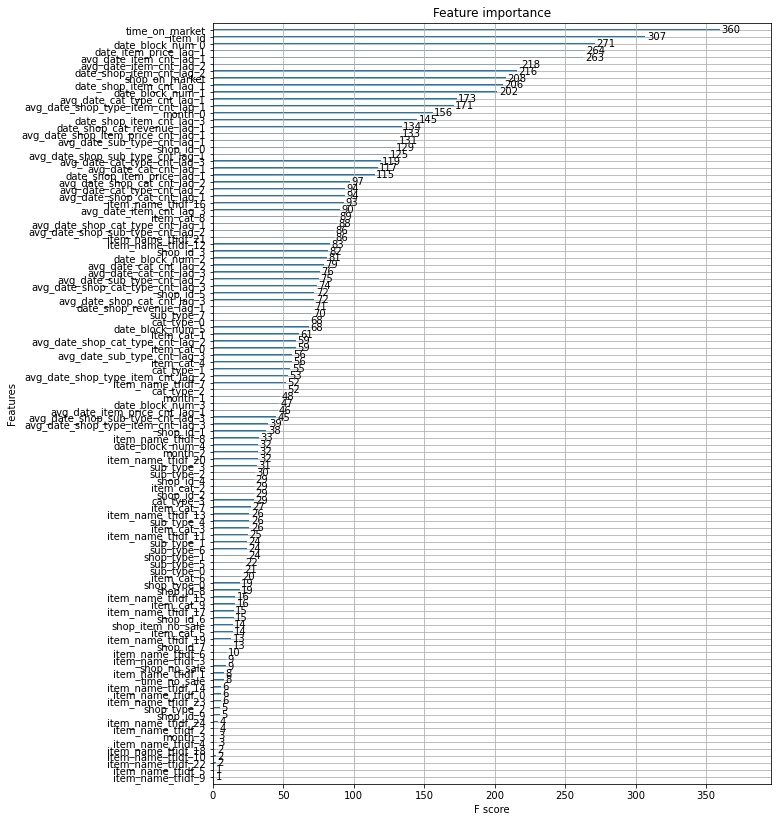

In [14]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(xgb_on_sale, (10,14))

In [15]:
import pickle

# save model to file
pickle.dump(xgb_on_sale, open("xgb_on_sale_1128.dat", "wb"))

#### 6.3 Validation

In [16]:
# load model from file
xgb_on_sale = pickle.load(open("xgb_on_sale_1128.dat", "rb"))

In [17]:
X_valid_on_sale = on_sale_data[(on_sale_data.date_block_num == val_date_block)].drop(['date_shop_item_cnt'], axis=1)
X_valid_on_sale_ft = X_valid_on_sale.copy()

In [18]:
embed_drop_list = [
    'date_block_num',
    'shop_id',
    'shop_type',
    'item_category_id', 
    'cat_type',
    'sub_type',
    'month',
]

X_valid_on_sale_ft.drop(embed_drop_list, axis=1, inplace=True)

In [19]:
#Y_pred_on_sale_lgb = lgb_on_sale.predict(X_valid_on_sale_ft).clip(0,20)
#Y_pred_on_sale_xgb = xgb_on_sale.predict(X_valid_on_sale_ft).clip(0,20)
#Y_pred_on_sale = 0.67*Y_pred_on_sale_lgb + 0.33*Y_pred_on_sale_xgb
#Y_pred_on_sale = ridge_on_sale.predict(X_valid_on_sale_ft).clip(0,20)[:,2]

Y_pred_on_sale = xgb_on_sale.predict(X_valid_on_sale_ft).clip(0,20)

X_valid_on_sale = X_valid_on_sale[['shop_id', 'item_id']]
X_valid_on_sale['Y_pred_on_sale'] = Y_pred_on_sale
X_valid_on_sale

,shop_id,item_id,Y_pred_on_sale
10674594,2,30,0.041142
10674595,2,31,0.086873
10674596,2,32,0.160270
10674597,2,33,0.249695
10674598,2,40,0.007695
...,...,...,...
10912761,59,22162,0.100808
10912762,59,22163,0.178618
10912763,59,22164,0.151751
10912764,59,22166,0.009779


In [20]:
Y_valid = data[data.date_block_num == val_date_block]
Y_valid

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,sub_type_2,sub_type_3,sub_type_4,sub_type_5,sub_type_6,sub_type_7,month_0,month_1,month_2,month_3
10674594,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,1.603588,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556
10674595,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,2.277320,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556
10674596,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,1.603588,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556
10674597,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,2.277320,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556
10674598,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,1.099456,-0.543302,-0.616452,0.565170,-0.831102,1.257596,0.132109,-0.063321,0.136406,0.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912761,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,1.603588,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556
10912762,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,1.603588,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556
10912763,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,2.277320,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556
10912764,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,0.681390,-0.769049,-0.814706,0.774649,-0.614455,0.033577,0.132109,-0.063321,0.136406,0.305556


In [21]:
Y_valid = pd.merge(Y_valid, X_valid_on_sale, on=['shop_id', 'item_id'], how='left')
Y_valid

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,sub_type_3,sub_type_4,sub_type_5,sub_type_6,sub_type_7,month_0,month_1,month_2,month_3,Y_pred_on_sale
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.041142
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.086873
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.160270
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.249695
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,-0.543302,-0.616452,0.565170,-0.831102,1.257596,0.132109,-0.063321,0.136406,0.305556,0.007695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.100808
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,-0.706945,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.178618
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,-0.846083,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.151751
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,-0.769049,-0.814706,0.774649,-0.614455,0.033577,0.132109,-0.063321,0.136406,0.305556,0.009779


In [22]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_valid['date_shop_item_cnt'], Y_valid['Y_pred_on_sale']))

print("The final rmse is {}".format(rmse))

The final rmse is 0.8627063632011414


#### 6.5 Error Analysis

#### 6.5.1 RMSE Calculation

In [23]:
df_item_id_rmse = Y_valid[['item_id', 'date_shop_item_cnt', 'Y_pred_on_sale']].reset_index(drop=True)
item_id_rmse = [-1] * (Y_valid.item_id.max() + 1)

for index, row in df_item_id_rmse.iterrows():
    if item_id_rmse[int(row.item_id)] == -1:
        item_id_rmse[int(row.item_id)] = np.sqrt(mean_squared_error(
            df_item_id_rmse[df_item_id_rmse.item_id == row.item_id]['date_shop_item_cnt'], 
            df_item_id_rmse[df_item_id_rmse.item_id == row.item_id]['Y_pred_on_sale']
        ))

def apply_item_id_rmse(row):
    return item_id_rmse[int(row.item_id)]

Y_valid['item_id_rmse'] = Y_valid.swifter.apply(apply_item_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,sub_type_4,sub_type_5,sub_type_6,sub_type_7,month_0,month_1,month_2,month_3,Y_pred_on_sale,item_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.041142,0.146606
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.086873,0.651367
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.160270,0.663086
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.249695,0.488770
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,-0.616452,0.565170,-0.831102,1.257596,0.132109,-0.063321,0.136406,0.305556,0.007695,0.115173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.100808,0.475586
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,-0.903334,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.178618,0.761719
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,-1.019895,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.151751,0.654297
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,-0.814706,0.774649,-0.614455,0.033577,0.132109,-0.063321,0.136406,0.305556,0.009779,0.682617


In [24]:
df_shop_id_rmse = Y_valid[['shop_id', 'date_shop_item_cnt', 'Y_pred_on_sale']].reset_index(drop=True)
shop_id_rmse = [-1] * (Y_valid.shop_id.max() + 1)

for index, row in df_shop_id_rmse.iterrows():
    if shop_id_rmse[int(row.shop_id)] == -1:
        shop_id_rmse[int(row.shop_id)] = np.sqrt(mean_squared_error(
            df_shop_id_rmse[df_shop_id_rmse.shop_id == row.shop_id]['date_shop_item_cnt'], 
            df_shop_id_rmse[df_shop_id_rmse.shop_id == row.shop_id]['Y_pred_on_sale']
        ))

def apply_shop_id_rmse(row):
    return shop_id_rmse[int(row.shop_id)]

Y_valid['shop_id_rmse'] = Y_valid.swifter.apply(apply_shop_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,sub_type_5,sub_type_6,sub_type_7,month_0,month_1,month_2,month_3,Y_pred_on_sale,item_id_rmse,shop_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.041142,0.146606,0.566406
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.086873,0.651367,0.566406
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.160270,0.663086,0.566406
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.249695,0.488770,0.566406
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,0.565170,-0.831102,1.257596,0.132109,-0.063321,0.136406,0.305556,0.007695,0.115173,0.566406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.100808,0.475586,0.498535
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,0.712955,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.178618,0.761719,0.498535
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,0.715887,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.151751,0.654297,0.498535
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,0.774649,-0.614455,0.033577,0.132109,-0.063321,0.136406,0.305556,0.009779,0.682617,0.498535


In [25]:
df_cat_id_rmse = Y_valid[['item_category_id', 'date_shop_item_cnt', 'Y_pred_on_sale']].reset_index(drop=True)
cat_id_rmse = [-1] * (Y_valid.item_category_id.max() + 1)

for index, row in df_cat_id_rmse.iterrows():
    if cat_id_rmse[int(row.item_category_id)] == -1:
        cat_id_rmse[int(row.item_category_id)] = np.sqrt(mean_squared_error(
            df_cat_id_rmse[df_cat_id_rmse.item_category_id == row.item_category_id]['date_shop_item_cnt'], 
            df_cat_id_rmse[df_cat_id_rmse.item_category_id == row.item_category_id]['Y_pred_on_sale']
        ))

def apply_cat_id_rmse(row):
    return cat_id_rmse[int(row.item_category_id)]

Y_valid['cat_id_rmse'] = Y_valid.swifter.apply(apply_cat_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,sub_type_6,sub_type_7,month_0,month_1,month_2,month_3,Y_pred_on_sale,item_id_rmse,shop_id_rmse,cat_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.041142,0.146606,0.566406,0.642090
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.086873,0.651367,0.566406,0.721191
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.160270,0.663086,0.566406,0.642090
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.249695,0.488770,0.566406,0.721191
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,-0.831102,1.257596,0.132109,-0.063321,0.136406,0.305556,0.007695,0.115173,0.566406,0.259277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.100808,0.475586,0.498535,0.642090
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,-1.091941,1.659046,0.132109,-0.063321,0.136406,0.305556,0.178618,0.761719,0.498535,0.642090
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,-1.351326,2.533916,0.132109,-0.063321,0.136406,0.305556,0.151751,0.654297,0.498535,0.721191
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,-0.614455,0.033577,0.132109,-0.063321,0.136406,0.305556,0.009779,0.682617,0.498535,0.538574


In [26]:
Y_valid.to_csv('v30_rmse_xgb_nr_em_m1.csv', index=False)

In [27]:
shop_id_rmse_rank = Y_valid[['shop_id', 'shop_id_rmse']].sort_values(by='shop_id_rmse', ascending=False).drop_duplicates()
shop_id_rmse_rank.head(10)

,shop_id,shop_id_rmse
32479,9,2.052734
81194,20,2.003906
97434,25,1.663086
113674,31,1.535156
162387,42,1.477539
110067,28,1.087891
212916,55,0.954590
83004,21,0.843262
23460,6,0.827637
224638,57,0.818359


In [28]:
item_id_rmse_rank = Y_valid[['item_id', 'item_id_rmse']].sort_values(by='item_id_rmse', ascending=False).drop_duplicates()
item_id_rmse_rank.head(20)

,item_id,item_id_rmse
148544,10202,10.171875
186434,10201,10.156250
207446,7223,9.414062
233131,1583,8.484375
95143,13247,7.042969
90250,15069,6.351562
131665,7224,6.031250
99045,6505,5.960938
51834,13241,5.574219
53053,17775,5.550781


In [29]:
cat_id_rmse_rank = Y_valid[['item_category_id', 'cat_id_rmse']].sort_values(by='cat_id_rmse', ascending=False).drop_duplicates()
cat_id_rmse_rank.head(20)

,item_category_id,cat_id_rmse
42981,71,4.328125
128821,79,3.603516
50761,42,3.593750
12267,35,2.593750
87311,20,2.416016
75761,83,2.160156
1583,28,2.009766
84377,47,1.662109
180474,29,1.636719
187287,33,1.576172


#### 6.6 Model Test

In [31]:
X_test_on_sale = on_sale_data[(on_sale_data.date_block_num == 34)].drop(['date_shop_item_cnt'], axis=1)

#Y_test_on_sale_lgb = lgb_on_sale.predict(X_test_on_sale).clip(0,20)
#Y_test_on_sale_xgb = xgb_on_sale.predict(X_test_on_sale).clip(0,20)
#Y_test_on_sale = 0.67*Y_test_on_sale_lgb + 0.33*Y_test_on_sale_xgb

X_test_on_sale_ft = X_test_on_sale.copy()
X_test_on_sale_ft.drop(embed_drop_list, axis=1, inplace=True)

Y_test_on_sale = xgb_on_sale.predict(X_test_on_sale_ft).clip(0,20)

In [32]:
# load test data set
df_test = pd.read_csv("v30_test_clean.csv")

submission = pd.DataFrame({
    "ID": df_test.index, 
    "item_cnt_month": Y_test_on_sale
})

submission.to_csv('v30_submission_xgb_nr_em_m1.csv', index=False)

In [ ]:
#0.90757